In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=Warning)
%matplotlib inline

# Dataset


In [11]:
d = pd.read_csv('/media/loop/Backup/vm/tos1/quic/online/quic.csv')
d = d[(d[['Resolution(w)']] != 0).all(axis=1)]
d.isnull().values.any()
# drop rows with missing values
d.dropna(inplace=True)
X=d.iloc[:, 13:265] 
#Y=d.iloc[:,11]
Y=d.loc[:,d.columns.isin(['Resolution(w)'])]

# Features

In [12]:
X.columns=(['DL_Th_CW','UL_Th_CW','DL_Th_TW-1','UL_Th_TW-1','DL_Th_TW-3','UL_Th_TW-3','DL_Th_TW-5','UL_Th_TW-5','DL_Th_TW-10','UL_Th_TW-10','DL_Th_TW-20','UL_Th_TW-20','DL_Th_SW','UL_Th_SW',
            'DL_Pkt_CW','UL_Pkt_CW','DL_Pkt_TW-1','UL_Pkt_TW-1','DL_Pkt_TW-3','UL_Pkt_TW-3','DL_Pkt_TW-5','UL_Pkt_TW-5','DL_Pkt_TW-10','UL_Pkt_TW-10','DL_Pkt_TW-20','UL_Pkt_TW-20','DL_Pkt_SW','UL_Pkt_SW',
            'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_mean_TW-1','UL_IA_mean_TW-1','DL_IA_mean_TW-3','UL_IA_mean_TW-3','DL_IA_mean_TW-5','UL_IA_mean_TW-5','DL_IA_mean_TW-10','UL_IA_mean_TW-10','DL_IA_mean_TW-20','UL_IA_mean_TW-20','DL_IA_mean_SW','UL_IA_mean_SW',
            'DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_medn_TW-1','UL_IA_medn_TW-1','DL_IA_medn_TW-3','UL_IA_medn_TW-3','DL_IA_medn_TW-5','UL_IA_medn_TW-5','DL_IA_medn_TW-10','UL_IA_medn_TW-10','DL_IA_medn_TW-20','UL_IA_medn_TW-20','DL_IA_med_SW','UL_IA_medn_SW',
            'DL_IA_std_CW','UL_IA_std_CW','DL_IA_std_TW-1','UL_IA_std_TW-1','DL_IA_std_TW-3','UL_IA_std_TW-3','DL_IA_std_TW-5','UL_IA_std_TW-5','DL_IA_std_TW-10','UL_IA_std_TW-10','DL_IA_std_TW-20','UL_IA_std_TW-20','DL_IA_std_SW','UL_IA_std_SW',
            'DL_IA_max_CW','UL_IA_max_CW','DL_IA_max_TW-1','UL_IA_max_TW-1','DL_IA_max_TW-3','UL_IA_max_TW-3','DL_IA_max_TW-5','UL_IA_max_TW-5','DL_IA_max_TW-10','UL_IA_max_TW-10','DL_IA_max_TW-20','UL_IA_max_TW-20','DL_IA_max_SW','UL_IA_max_SW',
            'DL_IA_min_CW','UL_IA_min_CW','DL_IA_min_TW-1','UL_IA_min_TW-1','DL_IA_min_TW-3','UL_IA_min_TW-3','DL_IA_min_TW-5','UL_IA_min_TW-5','DL_IA_min_TW-10','UL_IA_min_TW-10','DL_IA_min_TW-20','UL_IA_min_TW-20','DL_IA_min_SW','UL_IA_min_SW',
            'DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_mean_TW-1','UL_Pkt-S_mean_TW-1','DL_Pkt-S_mean_TW-3','UL_Pkt-S_mean_TW-3','DL_Pkt-S_mean_TW-5','UL_Pkt-S_mean_TW-5','DL_Pkt-S_mean_TW-10','UL_Pkt-S_mean_TW-10','DL_Pkt-S_mean_TW-20','UL_Pkt-S_mean_TW-20','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW',
            'DL_Pkt-S_medn_CW','UL_Pkt-S_medn_CW','DL_Pkt-S_medn_TW-1','UL_Pkt-S_medn_TW-1','DL_Pkt-S_medn_TW-3','UL_Pkt-S_medn_TW-3','DL_Pkt-S_medn_TW-5','UL_Pkt-S_medn_TW-5','DL_Pkt-S_medn_TW-10','UL_Pkt-S_medn_TW-10','DL_Pkt-S_medn_TW-20','UL_Pkt-S_medn_TW-20','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW',
            'DL_Pkt-S_std_CW','UL_Pkt-S_std_CW','DL_Pkt-S_std_TW-1','UL_Pkt-S_std_TW-1','DL_Pkt-S_std_TW-3','UL_Pkt-S_std_TW-3','DL_Pkt-S_std_TW-5','UL_Pkt-S_std_TW-5','DL_Pkt-S_std_TW-10','UL_Pkt-S_std_TW-10','DL_Pkt-S_std_TW-20','UL_Pkt-S_std_TW-20','DL_Pkt-S_std_SW','UL_Pkt-S_std_SW',
            'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_max_TW-1','UL_Pkt-S_max_TW-1','DL_Pkt-S_max_TW-3','UL_Pkt-S_max_TW-3','DL_Pkt-S_max_TW-5','UL_Pkt-S_max_TW-5','DL_Pkt-S_max_TW-10','UL_Pkt-S_max_TW-10','DL_Pkt-S_max_TW-20','UL_Pkt-S_max_TW-20','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW',
            'DL_Pkt-S_min_CW','UL_Pkt-S_min_CW','DL_Pkt-S_min_TW-1','UL_Pkt-S_min_TW-1','DL_Pkt-S_min_TW-3','UL_Pkt-S_min_TW-3','DL_Pkt-S_min_TW-5','UL_Pkt-S_min_TW-5','DL_Pkt-S_min_TW-10','UL_Pkt-S_min_TW-10','DL_Pkt-S_min_TW-20','UL_Pkt-S_min_TW-20','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW',
            ])

In [5]:
X.shape

(100757, 168)

# Target

In [13]:
conditions = [
    (Y[['Resolution(w)']]==320) ,  #LD
    (Y[['Resolution(w)']]==384),   #LD
    (Y[['Resolution(w)']]==512),   #SD
    (Y[['Resolution(w)']]==640),   #SD
    (Y[['Resolution(w)']]==736),   #SD
    (Y[['Resolution(w)']]==1280),  #HD
    (Y[['Resolution(w)']]==1920),  #HD
    ]

choices = ['0', '0', '1','1', '1', '2','2']
Y['quality'] = np.select(conditions, choices, default='None')


In [14]:
conditions = [
    (Y[['Resolution(w)']]==320) ,  
    (Y[['Resolution(w)']]==384),   #LD
    (Y[['Resolution(w)']]==512),   #SD
    (Y[['Resolution(w)']]==640),   #SD
    (Y[['Resolution(w)']]==736),   #SD
    (Y[['Resolution(w)']]==1280),  #HD
    (Y[['Resolution(w)']]==1920),  #HD
    ]

choices = ['LD', 'LD', 'SD','SD', 'SD', 'HD','HD']
Y['quality1'] = np.select(conditions, choices, default='None')
yy=Y['quality']

# Distribution of Target

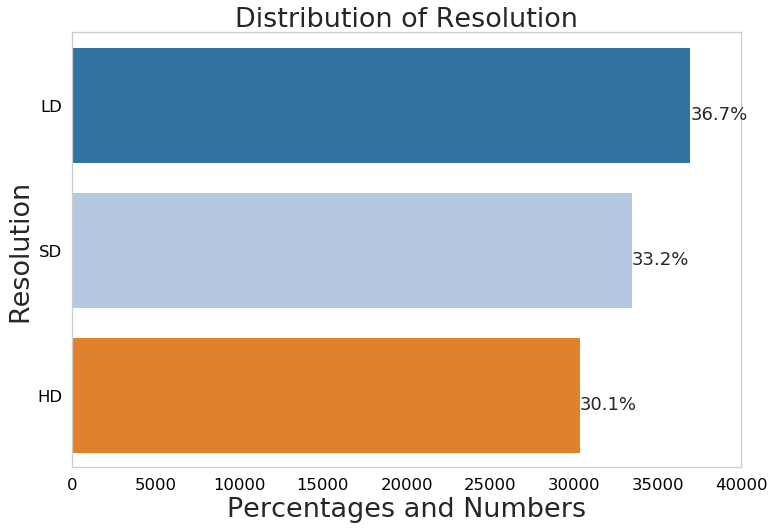

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
fig = plt.figure(figsize=(12,8))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
#df = pd.DataFrame(np.array([['a'], ['a'], ['b']]), columns=['current_status'])
ax = sns.countplot(y='quality1', data=Y,palette = "tab20")
ax.grid(False)
plt.title('Distribution of Resolution',fontsize=27)
plt.xlabel('Percentages and Numbers', fontsize=27)
plt.ylabel('Resolution',fontsize=27)
#plt.yticks(np.arange(0, 1200, 120))
plt.xticks(np.arange(0, 45000,5000))
plt.tick_params(axis='x',  colors='black')
plt.tick_params(axis='y', colors='black')

total = len(Y['quality1'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() / 1
        y = p.get_y() + 0.5
        ax.annotate(percentage, (x, y))

#plt.show()
plt.savefig('quic-resolution distrubutions.pdf')

# Model Benchmark

In [9]:
seed = 42

# prepare models

param_grids=[]
##logistic
param_grids_0= {           
    'penalty':['l1', 'l2'], 
}
param_grids.append(param_grids_0)

##knn
param_grids_1 = {                      
    'n_neighbors': [3,5,7,10,25]
}
param_grids.append(param_grids_1)

## Decision Tree
param_grids_2 = { 
    'criterion':['gini', 'entropy'],
    'max_depth': [ 3, 10, 50, None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 8],
    'class_weight': ['balanced',None]
}

param_grids.append(param_grids_2)
## NB
param_grids_3 = {   
    'priors':[None],
    'var_smoothing':[1e-09]
}

param_grids.append(param_grids_3)
 ## SVM
param_grids_4 = {  
     'gamma' :['scale'],
     'kernel' : [ 'rbf', 'poly'],
     #'degree' : [1,3,6],
     'C' : [0.01, 0.1, 1]

}
param_grids.append(param_grids_4)
 ### Random foresst
param_grids_5 = { 
    'max_depth': [ 3, 10, 50, 90, 100],
    'max_features': ['auto',None],
    'n_estimators': [100, 200,500],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'class_weight': ['balanced',None]
}
param_grids.append(param_grids_5)
### MLP
param_grids_6 = {    
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs' ],
    'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}
param_grids.append(param_grids_6)

models = []
models.append((LogisticRegression()))
models.append((KNeighborsClassifier()))
models.append((DecisionTreeClassifier()))
models.append((GaussianNB()))
models.append((SVC()))
models.append((RandomForestClassifier()))
models.append((MLPClassifier()))


best_estimator=[]


for i in range(7):
    #print(param_grids[i])
    #param_grids= param_grids_%d' % (i))
    grid_search = GridSearchCV(estimator = models[i], param_grid = param_grids[i],  cv =5, n_jobs = -1, verbose = 1, return_train_score=True)
    grid_search.fit(X, yy)
    #print(grid_search.best_params_)
    
    best_estimator.append(grid_search.best_estimator_)
    
print('----------------------------------------')
print('Best parameters for seven algorithms')
print('----------------------------------------')
print()

for j in range(7):
    print( best_estimator[j])
    print('\n')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    8.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.9min finished


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  30 | elapsed: 151.8min remaining: 198.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 164.2min finished


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed: 242.4min
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed: 494.2min
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed: 714.4min
[Parallel(n_jobs=-1)]: Done 2370 tasks      | elapsed: 1107.2min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 1357.2min finished


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 64.0min finished


----------------------------------------
Best parameters for seven algorithms
----------------------------------------

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=50, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
          

In [10]:
import warnings
warnings.filterwarnings('ignore')
import pickle

print('----------------------------------------')
#print('Box plot of all model cross validation accuracy')
print('----------------------------------------')
print()
# prepare configuration for cross validation test harness
seed = 42
# prepare models
models = []

models.append(('LR',  best_estimator[0])) #LogisticRegression()
models.append(('KNN', best_estimator[1])) #KNeighborsClassifier()))
models.append(('DTC', best_estimator[2])) #DecisionTreeClassifier()))
models.append(('GNB', best_estimator[3]))
models.append(('SVM', best_estimator[4]))
models.append(('RFC', best_estimator[5]))
models.append(('MLP', best_estimator[6]))
# evaluate each model in turn
# evaluate each model in turn
ac = []
tr = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_validate(model, X, yy, cv=kfold)
    ac.append((cv_results['test_score'])*100)
    tr.append((cv_results['fit_time'])/60)
    names.append(name)
    
    a_msg = "Accuracy %s: %f (%f)" % (name, ((cv_results['test_score'])*100).mean(), ((cv_results['test_score'])*100).std())
    t_msg = "Training time %s: %f (%f)" % (name, ((cv_results['fit_time'])/60).mean(),  ((cv_results['fit_time'])/60).std())
    print(a_msg)
    print(t_msg)
# boxplot algorithm comparison

----------------------------------------
----------------------------------------

Accuracy LR: 64.512664 (1.434665)
Training time LR: 0.067748 (0.003206)
Accuracy KNN: 81.811703 (1.003372)
Training time KNN: 0.055107 (0.001463)
Accuracy DTC: 92.448166 (0.467139)
Training time DTC: 0.188793 (0.007429)
Accuracy GNB: 62.423452 (0.888047)
Training time GNB: 0.006047 (0.000213)
Accuracy SVM: 57.025312 (0.520815)
Training time SVM: 27.626447 (0.240479)
Accuracy RFC: 95.630086 (0.543593)
Training time RFC: 3.368384 (0.023906)
Accuracy MLP: 64.216758 (7.332884)
Training time MLP: 2.614131 (0.027594)


In [57]:
X.columns=(['DL_Th_avg_CW','UL_Th_avg_CW','DL_Th_avg_TW-1','UL_Th_avg_TW-1','DL_Th_avg_TW-3','UL_Th_avg_TW-3','DL_Th_avg_TW-5','UL_Th_avg_TW-5','DL_Th_avg_TW-10','UL_Th_avg_TW-10','DL_Th_avg_TW-20','UL_Th_avg_TW-20','DL_Th_avg_SW','UL_Th_avg_SW',
            'DL_Pkt-N_total_CW','UL_Pkt-N_total_CW','DL_Pkt-N_total_TW-1','UL_Pkt-N_total_TW-1','DL_Pkt-N_total_TW-3','UL_Pkt-N_total_TW-3','DL_Pkt-N_total_TW-5','UL_Pkt-N_total_TW-5','DL_Pkt-N_total_TW-10','UL_Pkt-N_total_TW-10','DL_Pkt-N_total_TW-20','UL_Pkt-N_total_TW-20','DL_Pkt-N_total_SW','UL_Pkt-N_total_SW',
            'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_mean_TW-1','UL_IA_mean_TW-1','DL_IA_mean_TW-3','UL_IA_mean_TW-3','DL_IA_mean_TW-5','UL_IA_mean_TW-5','DL_IA_mean_TW-10','UL_IA_mean_TW-10','DL_IA_mean_TW-20','UL_IA_mean_TW-20','DL_IA_mean_SW','UL_IA_mean_SW',
            'DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_medn_TW-1','UL_IA_medn_TW-1','DL_IA_medn_TW-3','UL_IA_medn_TW-3','DL_IA_medn_TW-5','UL_IA_medn_TW-5','DL_IA_medn_TW-10','UL_IA_medn_TW-10','DL_IA_medn_TW-20','UL_IA_medn_TW-20','DL_IA_med_SW','UL_IA_medn_SW',
            'DL_IA_std_CW','UL_IA_std_CW','DL_IA_std_TW-1','UL_IA_std_TW-1','DL_IA_std_TW-3','UL_IA_std_TW-3','DL_IA_std_TW-5','UL_IA_std_TW-5','DL_IA_std_TW-10','UL_IA_std_TW-10','DL_IA_std_TW-20','UL_IA_std_TW-20','DL_IA_std_SW','UL_IA_std_SW',
            'DL_IA_max_CW','UL_IA_max_CW','DL_IA_max_TW-1','UL_IA_max_TW-1','DL_IA_max_TW-3','UL_IA_max_TW-3','DL_IA_max_TW-5','UL_IA_max_TW-5','DL_IA_max_TW-10','UL_IA_max_TW-10','DL_IA_max_TW-20','UL_IA_max_TW-20','DL_IA_max_SW','UL_IA_max_SW',
            'DL_IA_min_CW','UL_IA_min_CW','DL_IA_min_TW-1','UL_IA_min_TW-1','DL_IA_min_TW-3','UL_IA_min_TW-3','DL_IA_min_TW-5','UL_IA_min_TW-5','DL_IA_min_TW-10','UL_IA_min_TW-10','DL_IA_min_TW-20','UL_IA_min_TW-20','DL_IA_min_SW','UL_IA_min_SW',
            'DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_mean_TW-1','UL_Pkt-S_mean_TW-1','DL_Pkt-S_mean_TW-3','UL_Pkt-S_mean_TW-3','DL_Pkt-S_mean_TW-5','UL_Pkt-S_mean_TW-5','DL_Pkt-S_mean_TW-10','UL_Pkt-S_mean_TW-10','DL_Pkt-S_mean_TW-20','UL_Pkt-S_mean_TW-20','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW',
            'DL_Pkt-S_medn_CW','UL_Pkt-S_medn_CW','DL_Pkt-S_medn_TW-1','UL_Pkt-S_medn_TW-1','DL_Pkt-S_medn_TW-3','UL_Pkt-S_medn_TW-3','DL_Pkt-S_medn_TW-5','UL_Pkt-S_medn_TW-5','DL_Pkt-S_medn_TW-10','UL_Pkt-S_medn_TW-10','DL_Pkt-S_medn_TW-20','UL_Pkt-S_medn_TW-20','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW',
            'DL_Pkt-S_std_CW','UL_Pkt-S_std_CW','DL_Pkt-S_std_TW-1','UL_Pkt-S_std_TW-1','DL_Pkt-S_std_TW-3','UL_Pkt-S_std_TW-3','DL_Pkt-S_std_TW-5','UL_Pkt-S_std_TW-5','DL_Pkt-S_std_TW-10','UL_Pkt-S_std_TW-10','DL_Pkt-S_std_TW-20','UL_Pkt-S_std_TW-20','DL_Pkt-S_std_SW','UL_Pkt-S_std_SW',
            'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_max_TW-1','UL_Pkt-S_max_TW-1','DL_Pkt-S_max_TW-3','UL_Pkt-S_max_TW-3','DL_Pkt-S_max_TW-5','UL_Pkt-S_max_TW-5','DL_Pkt-S_max_TW-10','UL_Pkt-S_max_TW-10','DL_Pkt-S_max_TW-20','UL_Pkt-S_max_TW-20','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW',
            'DL_Pkt-S_min_CW','UL_Pkt-S_min_CW','DL_Pkt-S_min_TW-1','UL_Pkt-S_min_TW-1','DL_Pkt-S_min_TW-3','UL_Pkt-S_min_TW-3','DL_Pkt-S_min_TW-5','UL_Pkt-S_min_TW-5','DL_Pkt-S_min_TW-10','UL_Pkt-S_min_TW-10','DL_Pkt-S_min_TW-20','UL_Pkt-S_min_TW-20','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW',
            ])

In [58]:
X.shape

(100757, 168)

# Current Window

In [59]:
# C_all=X.loc[:,X.columns.isin(['DL_Th_CW','UL_Th_CW','DL_Pkt_CW','UL_Pkt_CW','DL_Pkt-g100_CW', 'UL_Pkt-g100_CW', 'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_std_CW','UL_IA_std_CW','DL_IA_max_CW','UL_IA_max_CW','DL_IA_min_CW','UL_IA_min_CW','DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_medn_CW','UL_Pkt-S_medn_CW','DL_Pkt-S_std_CW','UL_Pkt-S_std_CW', 'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_min_CW','UL_Pkt-S_min_CW','DL_Pkt-S-g100_mean_CW','UL_Pkt-S-g100_mean_CW','DL_Pkt-S-g100_medn_CW','UL_Pkt-S-g100_medn_CW','DL_Pkt-S-g100_std_CW','UL_Pkt-S-g100_std_CW',
# 'DL_Pkt-S--g100_max_CW','UL_Pkt-S-g100_max_CW','DL_Pkt-S-g100_min_CW','UL_Pkt-S-g100_min_CW'])]

#C_all=X.loc[:,X.columns.isin(['DL_Th_avg_CW','UL_Th_avg_CW','DL_Pkt-N_total_CW','UL_Pkt-N_total_CW', 'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_std_CW','UL_IA_std_CW','DL_IA_max_CW','UL_IA_max_CW','DL_IA_min_CW','UL_IA_min_CW','DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_medn_CW','UL_Pkt-S_medn_C','DL_Pkt-S_std_CW','UL_Pkt-S_std_CW', 'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_min_CW','UL_Pkt-S_min_CW'])]
C_all=X.loc[:,X.columns.isin(['DL_Th_avg_CW','UL_Th_avg_CW','DL_Pkt-N_total_CW','UL_Pkt-N_total_CW', 'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_std_CW','UL_IA_std_CW','DL_IA_max_CW','UL_IA_max_CW','DL_IA_min_CW','UL_IA_min_CW','DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_medn_CW','UL_Pkt-S_medn_CW','DL_Pkt-S_std_CW','UL_Pkt-S_std_CW', 'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_min_CW','UL_Pkt-S_min_CW'])]

In [60]:
C_all.shape

(100757, 24)

In [61]:
F=C_all.columns

In [62]:
yy.value_counts()

0    36953
1    33466
2    30338
Name: quality, dtype: int64

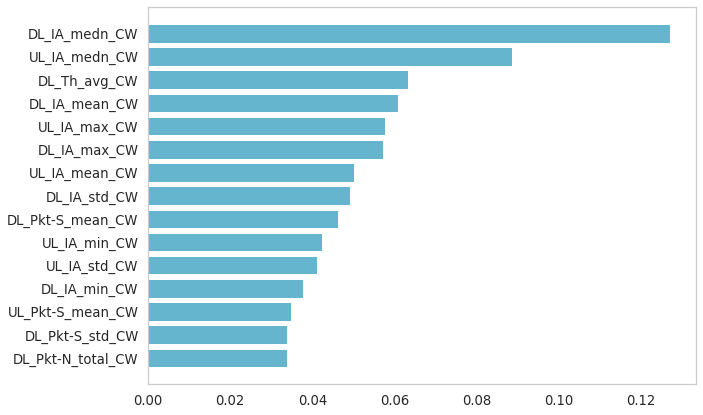

In [63]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(C_all, yy)

importances = clf.feature_importances_
indices = np.argsort(importances)
top_k = 15
new_indices = indices[-top_k:]
# fig = plt.figure(figsize=(26, 12))
# plt.rcParams["axes.grid"] = False
# plt.rcParams['font.size'] = 18
# plt.rc('ytick',labelsize=17)
# plt.rc('xtick',labelsize=17)
# #plt.title('Feature Importances')
# plt.barh(range(len(new_indices)), importances[new_indices], color='c', align='center')
# plt.yticks(range(len(new_indices)), [F[i] for i in new_indices])
# #plt.xticks((0, 0.02, 0.07))
# #plt.xlabel('Relative Importance')
# #plt.show()
# plt.savefig('CW-top10.pdf')
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
ax.barh(range(len(new_indices)), importances[new_indices], color='c',align='center')
plt.yticks(range(len(new_indices)), [F[i] for i in new_indices])

plt.tight_layout()
#plt.show()
plt.savefig('CW-15.pdf')

In [64]:
L=[]
for i in new_indices:
    l='%s'%F[i]
    L.append(l)
L

['DL_Pkt-N_total_CW',
 'DL_Pkt-S_std_CW',
 'UL_Pkt-S_mean_CW',
 'DL_IA_min_CW',
 'UL_IA_std_CW',
 'UL_IA_min_CW',
 'DL_Pkt-S_mean_CW',
 'DL_IA_std_CW',
 'UL_IA_mean_CW',
 'DL_IA_max_CW',
 'UL_IA_max_CW',
 'DL_IA_mean_CW',
 'DL_Th_avg_CW',
 'UL_IA_medn_CW',
 'DL_IA_medn_CW']

In [65]:
C_ten=X.loc[:,X.columns.isin(['DL_Pkt-N_total_CW',
 'DL_Pkt-S_std_CW',
 'UL_Pkt-S_mean_CW',
 'DL_IA_min_CW',
 'UL_IA_std_CW',
 'UL_IA_min_CW',
 'DL_Pkt-S_mean_CW',
 'DL_IA_std_CW',
 'UL_IA_mean_CW',
 'DL_IA_max_CW',
 'UL_IA_max_CW',
 'DL_IA_mean_CW',
 'DL_Th_avg_CW',
 'UL_IA_medn_CW',
 'DL_IA_medn_CW'])]

In [66]:
C_all_train, C_all_test,C_all_y_train, C_all_y_test = train_test_split( C_all, yy, test_size=0.2, random_state=101)
C_ten_train, C_ten_test,C_ten_y_train, C_ten_y_test = train_test_split( C_ten, yy, test_size=0.2, random_state=101)

In [67]:
# load the model from disk
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(C_all_train, C_all_y_train)


y_pred = model.predict(C_all_test)


accuracy = metrics.accuracy_score( C_all_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(C_all_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.6615
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.79      0.53      0.63      7382
          SD       0.76      0.60      0.67      6783
          HD       0.54      0.90      0.68      5987

    accuracy                           0.66     20152
   macro avg       0.70      0.67      0.66     20152
weighted avg       0.71      0.66      0.66     20152



In [68]:
# load the model from disk
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(C_ten_train, C_ten_y_train)


y_pred = model.predict(C_ten_test)


accuracy = metrics.accuracy_score( C_ten_y_test.ravel(), y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(C_ten_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.6652
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.80      0.53      0.63      7382
          SD       0.77      0.60      0.68      6783
          HD       0.54      0.90      0.68      5987

    accuracy                           0.67     20152
   macro avg       0.70      0.68      0.66     20152
weighted avg       0.71      0.67      0.66     20152



# Trend window

In [69]:
#T_all=X.loc[:,X.columns.isin(['DL_Th_TW-1','UL_Th_TW-1','DL_Th_TW-3','UL_Th_TW-3','DL_Th_TW-5','UL_Th_TW-5','DL_Th_TW-10','UL_Th_TW-10','DL_Th_TW-20','UL_Th_TW-20','DL_Pkt_TW-1','UL_Pkt_TW-1','DL_Pkt_TW-3','UL_Pkt_TW-3','DL_Pkt_TW-5','UL_Pkt_TW-5','DL_Pkt_TW-10','UL_Pkt_TW-10','DL_Pkt_TW-20','UL_Pkt_TW-20', 'DL_Pkt-g100_TW-1','UL_Pkt-g100_TW-1','DL_Pkt-g100_TW-3','UL_Pkt-g100_TW-3','DL_Pkt-g100_TW-5','UL_Pkt-g100_TW-5','DL_Pkt-g100_TW-10','UL_Pkt-g100_TW-10','DL_Pkt-g100_TW-20','UL_Pkt-g100_TW-20','DL_IA_mean_TW-1','UL_IA_mean_TW-1','DL_IA_mean_TW-3','UL_IA_mean_TW-3','DL_IA_mean_TW-5','UL_IA_mean_TW-5','DL_IA_mean_TW-10','UL_IA_mean_TW-10','DL_IA_mean_TW-20','UL_IA_mean_TW-20','DL_IA_medn_TW-1','UL_IA_medn_TW-1','DL_IA_medn_TW-3','UL_IA_medn_TW-3','DL_IA_medn_TW-5','UL_IA_medn_TW-5','DL_IA_medn_TW-10','UL_IA_medn_TW-10','DL_IA_medn_TW-20','UL_IA_medn_TW-20','DL_IA_std_TW-1','UL_IA_std_TW-1','DL_IA_std_TW-3','UL_IA_std_TW-3','DL_IA_std_TW-5','UL_IA_std_TW-5','DL_IA_std_TW-10','UL_IA_std_TW-10','DL_IA_std_TW-20','UL_IA_std_TW-20','DL_IA_max_TW-1','UL_IA_max_TW-1','DL_IA_max_TW-3','UL_IA_max_TW-3','DL_IA_max_TW-5','UL_IA_max_TW-5','DL_IA_max_TW-10','UL_IA_max_TW-10','DL_IA_max_TW-20','UL_IA_max_TW-20','DL_IA_min_TW-1','UL_IA_min_TW-1','DL_IA_min_TW-3','UL_IA_min_TW-3','DL_IA_min_TW-5','UL_IA_min_TW-5','DL_IA_min_TW-10','UL_IA_min_TW-10','DL_IA_min_TW-20','UL_IA_min_TW-20','DL_Pkt-S_mean_TW-1','UL_Pkt-S_mean_TW-1','DL_Pkt-S_mean_TW-3','UL_Pkt-S_mean_TW-3','DL_Pkt-S_mean_TW-5','UL_Pkt-S_mean_TW-5','DL_Pkt-S_mean_TW-10','UL_Pkt-S_mean_TW-10','DL_Pkt-S_mean_TW-20','UL_Pkt-S_mean_TW-20','DL_Pkt-S_medn_TW-1','UL_Pkt-S_medn_TW-1','DL_Pkt-S_medn_TW-3','UL_Pkt-S_medn_TW-3','DL_Pkt-S_medn_TW-5','UL_Pkt-S_medn_TW-5','DL_Pkt-S_medn_TW-10','UL_Pkt-S_medn_TW-10','DL_Pkt-S_medn_TW-20','UL_Pkt-S_medn_TW-20','DL_Pkt-S_std_TW-1','UL_Pkt-S_std_TW-1','DL_Pkt-S_std_TW-3','UL_Pkt-S_std_TW-3','DL_Pkt-S_std_TW-5','UL_Pkt-S_std_TW-5','DL_Pkt-S_std_TW-10','UL_Pkt-S_std_TW-10','DL_Pkt-S_std_TW-20','UL_Pkt-S_std_TW-20','DL_Pkt-S_max_TW-1','UL_Pkt-S_max_TW-1','DL_Pkt-S_max_TW-3','UL_Pkt-S_max_TW-3','DL_Pkt-S_max_TW-5','UL_Pkt-S_max_TW-5','DL_Pkt-S_max_TW-10','UL_Pkt-S_max_TW-10','DL_Pkt-S_max_TW-20','UL_Pkt-S_max_TW-20','DL_Pkt-S_min_TW-1','UL_Pkt-S_min_TW-1','DL_Pkt-S_min_TW-3','UL_Pkt-S_min_TW-3','DL_Pkt-S_min_TW-5','UL_Pkt-S_min_TW-5','DL_Pkt-S_min_TW-10','UL_Pkt-S_min_TW-10','DL_Pkt-S_min_TW-20','UL_Pkt-S_min_TW-20','DL_Pkt-S-g100_mean_TW-1','UL_Pkt-S-g100_mean_TW-1','DL_Pkt-S-g100_mean_TW-3','UL_Pkt-S-g100_mean_TW-3','DL_Pkt-S-g100_mean_TW-5','UL_Pkt-S-g100_mean_TW-5','DL_Pkt-S-g100_mean_TW-10','UL_Pkt-S-g100_mean_TW-10','DL_Pkt-S-g100_mean_TW-20','UL_Pkt-S-g100_mean_TW-20','DL_Pkt-S-g100_medn_TW-1','UL_Pkt-S-g100_medn_TW-1','DL_Pkt-S-g100_medn_TW-3','UL_Pkt-S-g100_medn_TW-3','DL_Pkt-S-g100_medn_TW-5','UL_Pkt-S-g100_medn_TW-5','DL_Pkt-S-g100_medn_TW-10','UL_Pkt-S-g100_medn_TW-10','DL_Pkt-S-g100_medn_TW-20','UL_Pkt-S-g100_medn_TW-20','DL_Pkt-S-g100_std_TW-1','UL_Pkt-S-g100_std_TW-1','DL_Pkt-S-g100_std_TW-3','UL_Pkt-S-g100_std_TW-3','DL_Pkt-S-g100_std_TW-5','UL_Pkt-S-g100_std_TW-5','DL_Pkt-S-g100_std_TW-10','UL_Pkt-S-g100_std_TW-10','DL_Pkt-S-g100_std_TW-20','UL_Pkt-S-g100_std_TW-20','DL_Pkt-S-g100_max_TW-1','UL_Pkt-S-g100_max_TW-1','DL_Pkt-S-g100_max_TW-3','UL_Pkt-S-g100_max_TW-3','DL_Pkt-S-g100_max_TW-5','UL_Pkt-S-g100_max_TW-5','DL_Pkt-S-g100_max_TW-10','UL_Pkt-S-g100_max_TW-10','DL_Pkt-S-g100_max_TW-20','UL_Pkt-S-g100_max_TW-20','DL_Pkt-S-g100_min_TW-1','UL_Pkt-S-g100_min_TW-1','DL_Pkt-S-g100_min_TW-3','UL_Pkt-S-g100_min_TW-3','DL_Pkt-S-g100_min_TW-5','UL_Pkt-S-g100_min_TW-5','DL_Pkt-S-g100_min_TW-10','UL_Pkt-S-g100_min_TW-10','DL_Pkt-S-g100_min_TW-20','UL_Pkt-S-g100_min_TW-20'])]
T_all=X.loc[:,X.columns.isin(['DL_Th_avg_TW-1','UL_Th_avg_TW-1','DL_Th_avg_TW-3','UL_Th_avg_TW-3','DL_Th_avg_TW-5','UL_Th_avg_TW-5','DL_Th_avg_TW-10','UL_Th_avg_TW-10','DL_Th_avg_TW-20','UL_Th_avg_TW-20','DL_Pkt-N_total_TW-1','UL_Pkt-N_total_TW-1','DL_Pkt-N_total_TW-3','UL_Pkt-N_total_TW-3','DL_Pkt-N_total_TW-5','UL_Pkt-N_total_TW-5','DL_Pkt-N_total_TW-10','UL_Pkt-N_total_TW-10','DL_Pkt-N_total_TW-20','UL_Pkt-N_total_TW-20','DL_Pkt-g100_TW-1','UL_Pkt-g100_TW-1','DL_Pkt-g100_TW-3','UL_Pkt-g100_TW-3','DL_Pkt-g100_TW-5','UL_Pkt-g100_TW-5','DL_Pkt-g100_TW-10','UL_Pkt-g100_TW-10','DL_Pkt-g100_TW-20','UL_Pkt-g100_TW-20','DL_IA_mean_TW-1','UL_IA_mean_TW-1','DL_IA_mean_TW-3','UL_IA_mean_TW-3','DL_IA_mean_TW-5','UL_IA_mean_TW-5','DL_IA_mean_TW-10','UL_IA_mean_TW-10','DL_IA_mean_TW-20','UL_IA_mean_TW-20','DL_IA_medn_TW-1','UL_IA_medn_TW-1','DL_IA_medn_TW-3','UL_IA_medn_TW-3','DL_IA_medn_TW-5','UL_IA_medn_TW-5','DL_IA_medn_TW-10','UL_IA_medn_TW-10','DL_IA_medn_TW-20','UL_IA_medn_TW-20','DL_IA_std_TW-1','UL_IA_std_TW-1','DL_IA_std_TW-3','UL_IA_std_TW-3','DL_IA_std_TW-5','UL_IA_std_TW-5','DL_IA_std_TW-10','UL_IA_std_TW-10','DL_IA_std_TW-20','UL_IA_std_TW-20','DL_IA_max_TW-1','UL_IA_max_TW-1','DL_IA_max_TW-3','UL_IA_max_TW-3','DL_IA_max_TW-5','UL_IA_max_TW-5','DL_IA_max_TW-10','UL_IA_max_TW-10','DL_IA_max_TW-20','UL_IA_max_TW-20','DL_IA_min_TW-1','UL_IA_min_TW-1','DL_IA_min_TW-3','UL_IA_min_TW-3','DL_IA_min_TW-5','UL_IA_min_TW-5','DL_IA_min_TW-10','UL_IA_min_TW-10','DL_IA_min_TW-20','UL_IA_min_TW-20','DL_Pkt-S_mean_TW-1','UL_Pkt-S_mean_TW-1','DL_Pkt-S_mean_TW-3','UL_Pkt-S_mean_TW-3','DL_Pkt-S_mean_TW-5','UL_Pkt-S_mean_TW-5','DL_Pkt-S_mean_TW-10','UL_Pkt-S_mean_TW-10','DL_Pkt-S_mean_TW-20','UL_Pkt-S_mean_TW-20','DL_Pkt-S_medn_TW-1','UL_Pkt-S_medn_TW-1','DL_Pkt-S_medn_TW-3','UL_Pkt-S_medn_TW-3','DL_Pkt-S_medn_TW-5','UL_Pkt-S_medn_TW-5','DL_Pkt-S_medn_TW-10','UL_Pkt-S_medn_TW-10','DL_Pkt-S_medn_TW-20','UL_Pkt-S_medn_TW-20','DL_Pkt-S_std_TW-1','UL_Pkt-S_std_TW-1','DL_Pkt-S_std_TW-3','UL_Pkt-S_std_TW-3','DL_Pkt-S_std_TW-5','UL_Pkt-S_std_TW-5','DL_Pkt-S_std_TW-10','UL_Pkt-S_std_TW-10','DL_Pkt-S_std_TW-20','UL_Pkt-S_std_TW-20','DL_Pkt-S_max_TW-1','UL_Pkt-S_max_TW-1','DL_Pkt-S_max_TW-3','UL_Pkt-S_max_TW-3','DL_Pkt-S_max_TW-5','UL_Pkt-S_max_TW-5','DL_Pkt-S_max_TW-10','UL_Pkt-S_max_TW-10','DL_Pkt-S_max_TW-20','UL_Pkt-S_max_TW-20','DL_Pkt-S_min_TW-1','UL_Pkt-S_min_TW-1','DL_Pkt-S_min_TW-3','UL_Pkt-S_min_TW-3','DL_Pkt-S_min_TW-5','UL_Pkt-S_min_TW-5','DL_Pkt-S_min_TW-10','UL_Pkt-S_min_TW-10','DL_Pkt-S_min_TW-20','UL_Pkt-S_min_TW-20'])]

In [70]:
F1=T_all.columns

In [71]:
T_all.shape

(100757, 120)

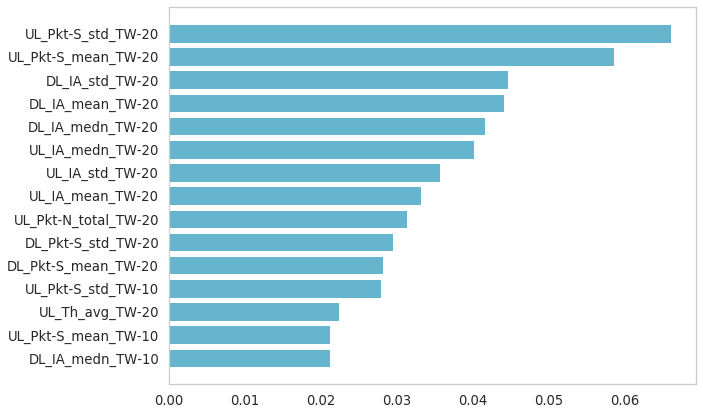

In [72]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(T_all, yy)

importances = clf.feature_importances_
indices = np.argsort(importances)
top_k = 15
new_indices = indices[-top_k:]
# fig = plt.figure(figsize=(26, 12))
# plt.rcParams["axes.grid"] = False
# plt.rcParams['font.size'] = 18
# plt.rc('ytick',labelsize=15)
# plt.rc('xtick',labelsize=15)
# #plt.title('Feature Importances')
# plt.barh(range(len(new_indices)), importances[new_indices], color='c', align='center')
# plt.yticks(range(len(new_indices)), [F1[i] for i in new_indices])
# #plt.xticks((0, 0.02, 0.07))
# #plt.xlabel('Relative Importance')
# #plt.show()
# plt.savefig('TW-top10.pdf')
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
ax.barh(range(len(new_indices)), importances[new_indices], color='c',align='center')
plt.yticks(range(len(new_indices)), [F1[i] for i in new_indices])

plt.tight_layout()
#plt.show()
plt.savefig('TW-15.pdf')

In [73]:
L=[]
for i in new_indices:
    l='%s'%F1[i]
    L.append(l)
L

['DL_IA_medn_TW-10',
 'UL_Pkt-S_mean_TW-10',
 'UL_Th_avg_TW-20',
 'UL_Pkt-S_std_TW-10',
 'DL_Pkt-S_mean_TW-20',
 'DL_Pkt-S_std_TW-20',
 'UL_Pkt-N_total_TW-20',
 'UL_IA_mean_TW-20',
 'UL_IA_std_TW-20',
 'UL_IA_medn_TW-20',
 'DL_IA_medn_TW-20',
 'DL_IA_mean_TW-20',
 'DL_IA_std_TW-20',
 'UL_Pkt-S_mean_TW-20',
 'UL_Pkt-S_std_TW-20']

In [74]:
T_ten=X.loc[:,X.columns.isin(['DL_IA_medn_TW-10',
 'UL_Pkt-S_mean_TW-10',
 'UL_Th_avg_TW-20',
 'UL_Pkt-S_std_TW-10',
 'DL_Pkt-S_mean_TW-20',
 'DL_Pkt-S_std_TW-20',
 'UL_Pkt-N_total_TW-20',
 'UL_IA_mean_TW-20',
 'UL_IA_std_TW-20',
 'UL_IA_medn_TW-20',
 'DL_IA_medn_TW-20',
 'DL_IA_mean_TW-20',
 'DL_IA_std_TW-20',
 'UL_Pkt-S_mean_TW-20',
 'UL_Pkt-S_std_TW-20'])]

In [75]:
T_all_train, T_all_test,T_all_y_train, T_all_y_test = train_test_split( T_all, yy, test_size=0.2, random_state=101)
T_ten_train, T_ten_test,T_ten_y_train, T_ten_y_test = train_test_split( T_ten, yy, test_size=0.2, random_state=101)

In [76]:
# load the model from disk
model =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(T_all_train, T_all_y_train)

y_pred = model.predict(T_all_test)


accuracy = metrics.accuracy_score( T_all_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(T_all_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.8991
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.97      0.83      0.90      7382
          SD       0.97      0.89      0.93      6783
          HD       0.78      0.99      0.87      5987

    accuracy                           0.90     20152
   macro avg       0.91      0.90      0.90     20152
weighted avg       0.92      0.90      0.90     20152



In [77]:
# load the model from disk
model =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(T_ten_train, T_ten_y_train)
y_pred = model.predict(T_ten_test)


accuracy = metrics.accuracy_score( T_ten_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(T_ten_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.8927
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.97      0.83      0.89      7382
          SD       0.96      0.89      0.92      6783
          HD       0.77      0.98      0.87      5987

    accuracy                           0.89     20152
   macro avg       0.90      0.90      0.89     20152
weighted avg       0.91      0.89      0.89     20152



# Session window

In [91]:
#S_all=X.loc[:,X.columns.isin(['DL_Th_SW','UL_Th_SW','DL_Pkt_SW','UL_Pkt_SW','DL_Pkt-g100_SW','UL_Pkt-g100_SW','DL_IA_mean_SW','UL_IA_mean_SW','DL_IA_medn_SW','UL_IA_medn_SW','DL_IA_SWtd_SW','UL_IA_SWtd_SW','DL_IA_max_SW','UL_IA_max_SW','DL_IA_min_SW','UL_IA_min_SW','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW','UL_Pkt-S_medn_TW-20','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW','DL_Pkt-S_SWtd_SW','UL_Pkt-S_SWtd_SW','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW','DL_Pkt-S-g100_mean_SW','UL_Pkt-S-g100_mean_SW','DL_Pkt-S-g100_medn_SW','UL_Pkt-S-g100_medn_SW','DL_Pkt-S-g100_SWtd_SW','UL_Pkt-S-g100_SWtd_SW','DL_Pkt-S-g100_max_SW','UL_Pkt-S-g100_max_SW','DL_Pkt-S-g100_min_SW','UL_Pkt-S-g100_min_SW'])]
#S_all=X.loc[:,X.columns.isin(['DL_Th_avg_SW','UL_Th_avg_SW','DL_Pkt-N_total_SW','UL_Pkt-N_total_SW','DL_IA_mean_SW','UL_IA_mean_SW','DL_IA_medn_SW','UL_IA_medn_SW','DL_IA_SWtd_SW','UL_IA_SWtd_SW','DL_IA_max_SW','UL_IA_max_SW','DL_IA_min_SW','UL_IA_min_SW','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW','UL_Pkt-S_medn_TW-20','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW','DL_Pkt-S_SWtd_SW','UL_Pkt-S_SWtd_SW','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW'])]
S_all=X.loc[:,X.columns.isin(['DL_Th_avg_SW','UL_Th_avg_SW', 'DL_Pkt-N_total_SW','UL_Pkt-N_total_SW', 'DL_IA_mean_SW','UL_IA_mean_SW','DL_IA_med_SW','UL_IA_medn_SW', 'DL_IA_std_SW','UL_IA_std_SW','DL_IA_max_SW','UL_IA_max_SW', 'DL_IA_min_SW','UL_IA_min_SW',
'DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW','DL_Pkt-S_std_SW','UL_Pkt-S_std_SW', 'DL_Pkt-S_max_SW','UL_Pkt-S_max_SW','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW'])]
#S_all=X.loc[:,X.columns.isin(['DL_Th_SW','UL_Th_SW','DL_Pkt_SW','UL_Pkt_SW' ,'DL_IA_mean_SW','UL_IA_mean_SW', 'DL_IA_med_SW','UL_IA_medn_SW', 'DL_IA_std_SW','UL_IA_std_SW', 'DL_IA_max_SW','UL_IA_max_SW', 'DL_IA_min_SW','UL_IA_min_SW','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW',  'DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW', 'DL_Pkt-S_std_SW','UL_Pkt-S_std_SW','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW'])]

In [92]:
S_all.shape

(100757, 24)

In [93]:
F2=S_all.columns

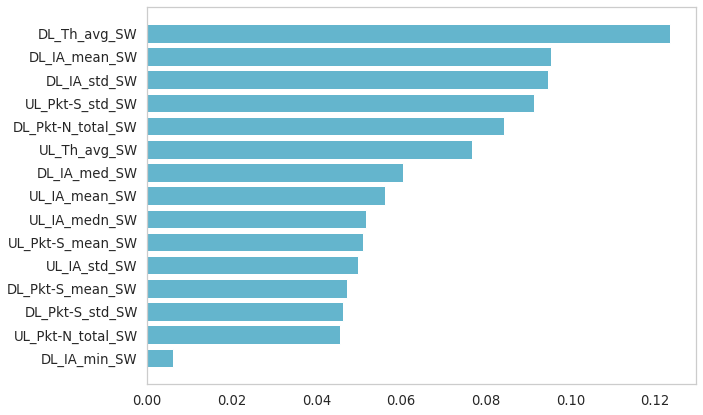

In [94]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clf.fit(S_all, yy)

importances = clf.feature_importances_
indices = np.argsort(importances)
top_k = 15
new_indices = indices[-top_k:]
# fig = plt.figure(figsize=(26, 12))
# plt.rcParams["axes.grid"] = False
# plt.rcParams['font.size'] = 18
# plt.rc('ytick',labelsize=15)
# plt.rc('xtick',labelsize=15)
# #plt.title('Feature Importances')
# plt.barh(range(len(new_indices)), importances[new_indices], color='c', align='edge')
# plt.yticks(range(len(new_indices)), [F2[i] for i in new_indices])
# #plt.xticks((0, 0.02, 0.07))
# #plt.xlabel('Relative Importance')
# #plt.show()
# plt.savefig('SW.pdf')
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
ax.barh(range(len(new_indices)), importances[new_indices], color='c',align='center')
plt.yticks(range(len(new_indices)), [F2[i] for i in new_indices])

plt.tight_layout()
#plt.show()
plt.savefig('SW.pdf')

In [95]:
L=[]
for i in new_indices:
    l='%s'%F2[i]
    L.append(l)
L

['DL_IA_min_SW',
 'UL_Pkt-N_total_SW',
 'DL_Pkt-S_std_SW',
 'DL_Pkt-S_mean_SW',
 'UL_IA_std_SW',
 'UL_Pkt-S_mean_SW',
 'UL_IA_medn_SW',
 'UL_IA_mean_SW',
 'DL_IA_med_SW',
 'UL_Th_avg_SW',
 'DL_Pkt-N_total_SW',
 'UL_Pkt-S_std_SW',
 'DL_IA_std_SW',
 'DL_IA_mean_SW',
 'DL_Th_avg_SW']

In [96]:
S_ten=X.loc[:,X.columns.isin(['DL_IA_min_SW',
 'UL_Pkt-N_total_SW',
 'DL_Pkt-S_std_SW',
 'DL_Pkt-S_mean_SW',
 'UL_IA_std_SW',
 'UL_Pkt-S_mean_SW',
 'UL_IA_medn_SW',
 'UL_IA_mean_SW',
 'DL_IA_med_SW',
 'UL_Th_avg_SW',
 'DL_Pkt-N_total_SW',
 'UL_Pkt-S_std_SW',
 'DL_IA_std_SW',
 'DL_IA_mean_SW',
 'DL_Th_avg_SW'])]

In [97]:
S_all_train, S_all_test,S_all_y_train, S_all_y_test = train_test_split( S_all, yy, test_size=0.2, random_state=101)
S_ten_train, S_ten_test,S_ten_y_train, S_ten_y_test = train_test_split( S_ten, yy, test_size=0.2, random_state=101)

In [98]:
# load the model from disk
model =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(S_all_train, S_all_y_train)


y_pred = model.predict(S_all_test)


accuracy = metrics.accuracy_score( S_all_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(S_all_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.9894
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.99      0.99      0.99      7382
          SD       0.99      0.98      0.98      6783
          HD       0.99      1.00      0.99      5987

    accuracy                           0.99     20152
   macro avg       0.99      0.99      0.99     20152
weighted avg       0.99      0.99      0.99     20152



In [99]:
# load the model from disk
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(S_ten_train, S_ten_y_train)
y_pred = model.predict(S_ten_test)


accuracy = metrics.accuracy_score( S_ten_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(S_ten_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.9887
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.99      0.99      0.99      7382
          SD       0.99      0.98      0.98      6783
          HD       0.99      1.00      0.99      5987

    accuracy                           0.99     20152
   macro avg       0.99      0.99      0.99     20152
weighted avg       0.99      0.99      0.99     20152



# All Window

In [100]:
A_all=X.loc[:,X.columns.isin(['DL_Th_avg_CW','UL_Th_avg_CW','DL_Th_avg_TW-1','UL_Th_avg_TW-1','DL_Th_avg_TW-3','UL_Th_avg_TW-3','DL_Th_avg_TW-5','UL_Th_avg_TW-5','DL_Th_avg_TW-10','UL_Th_avg_TW-10','DL_Th_avg_TW-20','UL_Th_avg_TW-20','DL_Th_avg_SW','UL_Th_avg_SW',
            'DL_Pkt-N_total_CW','UL_Pkt-N_total_CW','DL_Pkt-N_total_TW-1','UL_Pkt-N_total_TW-1','DL_Pkt-N_total_TW-3','UL_Pkt-N_total_TW-3','DL_Pkt-N_total_TW-5','UL_Pkt-N_total_TW-5','DL_Pkt-N_total_TW-10','UL_Pkt-N_total_TW-10','DL_Pkt-N_total_TW-20','UL_Pkt-N_total_TW-20','DL_Pkt-N_total_SW','UL_Pkt-N_total_SW',
            'DL_IA_mean_CW','UL_IA_mean_CW','DL_IA_mean_TW-1','UL_IA_mean_TW-1','DL_IA_mean_TW-3','UL_IA_mean_TW-3','DL_IA_mean_TW-5','UL_IA_mean_TW-5','DL_IA_mean_TW-10','UL_IA_mean_TW-10','DL_IA_mean_TW-20','UL_IA_mean_TW-20','DL_IA_mean_SW','UL_IA_mean_SW',
            'DL_IA_medn_CW','UL_IA_medn_CW','DL_IA_medn_TW-1','UL_IA_medn_TW-1','DL_IA_medn_TW-3','UL_IA_medn_TW-3','DL_IA_medn_TW-5','UL_IA_medn_TW-5','DL_IA_medn_TW-10','UL_IA_medn_TW-10','DL_IA_medn_TW-20','UL_IA_medn_TW-20','DL_IA_med_SW','UL_IA_medn_SW',
            'DL_IA_std_CW','UL_IA_std_CW','DL_IA_std_TW-1','UL_IA_std_TW-1','DL_IA_std_TW-3','UL_IA_std_TW-3','DL_IA_std_TW-5','UL_IA_std_TW-5','DL_IA_std_TW-10','UL_IA_std_TW-10','DL_IA_std_TW-20','UL_IA_std_TW-20','DL_IA_std_SW','UL_IA_std_SW',
            'DL_IA_max_CW','UL_IA_max_CW','DL_IA_max_TW-1','UL_IA_max_TW-1','DL_IA_max_TW-3','UL_IA_max_TW-3','DL_IA_max_TW-5','UL_IA_max_TW-5','DL_IA_max_TW-10','UL_IA_max_TW-10','DL_IA_max_TW-20','UL_IA_max_TW-20','DL_IA_max_SW','UL_IA_max_SW',
            'DL_IA_min_CW','UL_IA_min_CW','DL_IA_min_TW-1','UL_IA_min_TW-1','DL_IA_min_TW-3','UL_IA_min_TW-3','DL_IA_min_TW-5','UL_IA_min_TW-5','DL_IA_min_TW-10','UL_IA_min_TW-10','DL_IA_min_TW-20','UL_IA_min_TW-20','DL_IA_min_SW','UL_IA_min_SW',
            'DL_Pkt-S_mean_CW','UL_Pkt-S_mean_CW','DL_Pkt-S_mean_TW-1','UL_Pkt-S_mean_TW-1','DL_Pkt-S_mean_TW-3','UL_Pkt-S_mean_TW-3','DL_Pkt-S_mean_TW-5','UL_Pkt-S_mean_TW-5','DL_Pkt-S_mean_TW-10','UL_Pkt-S_mean_TW-10','DL_Pkt-S_mean_TW-20','UL_Pkt-S_mean_TW-20','DL_Pkt-S_mean_SW','UL_Pkt-S_mean_SW',
            'DL_Pkt-S_medn_CW','UL_Pkt-S_medn_CW','DL_Pkt-S_medn_TW-1','UL_Pkt-S_medn_TW-1','DL_Pkt-S_medn_TW-3','UL_Pkt-S_medn_TW-3','DL_Pkt-S_medn_TW-5','UL_Pkt-S_medn_TW-5','DL_Pkt-S_medn_TW-10','UL_Pkt-S_medn_TW-10','DL_Pkt-S_medn_TW-20','UL_Pkt-S_medn_TW-20','DL_Pkt-S_medn_SW','UL_Pkt-S_medn_SW',
            'DL_Pkt-S_std_CW','UL_Pkt-S_std_CW','DL_Pkt-S_std_TW-1','UL_Pkt-S_std_TW-1','DL_Pkt-S_std_TW-3','UL_Pkt-S_std_TW-3','DL_Pkt-S_std_TW-5','UL_Pkt-S_std_TW-5','DL_Pkt-S_std_TW-10','UL_Pkt-S_std_TW-10','DL_Pkt-S_std_TW-20','UL_Pkt-S_std_TW-20','DL_Pkt-S_std_SW','UL_Pkt-S_std_SW',
            'DL_Pkt-S_max_CW','UL_Pkt-S_max_CW','DL_Pkt-S_max_TW-1','UL_Pkt-S_max_TW-1','DL_Pkt-S_max_TW-3','UL_Pkt-S_max_TW-3','DL_Pkt-S_max_TW-5','UL_Pkt-S_max_TW-5','DL_Pkt-S_max_TW-10','UL_Pkt-S_max_TW-10','DL_Pkt-S_max_TW-20','UL_Pkt-S_max_TW-20','DL_Pkt-S_max_SW','UL_Pkt-S_max_SW',
            'DL_Pkt-S_min_CW','UL_Pkt-S_min_CW','DL_Pkt-S_min_TW-1','UL_Pkt-S_min_TW-1','DL_Pkt-S_min_TW-3','UL_Pkt-S_min_TW-3','DL_Pkt-S_min_TW-5','UL_Pkt-S_min_TW-5','DL_Pkt-S_min_TW-10','UL_Pkt-S_min_TW-10','DL_Pkt-S_min_TW-20','UL_Pkt-S_min_TW-20','DL_Pkt-S_min_SW','UL_Pkt-S_min_SW'])]

In [101]:
F3=A_all.columns

In [102]:
A_all.shape

(100757, 168)

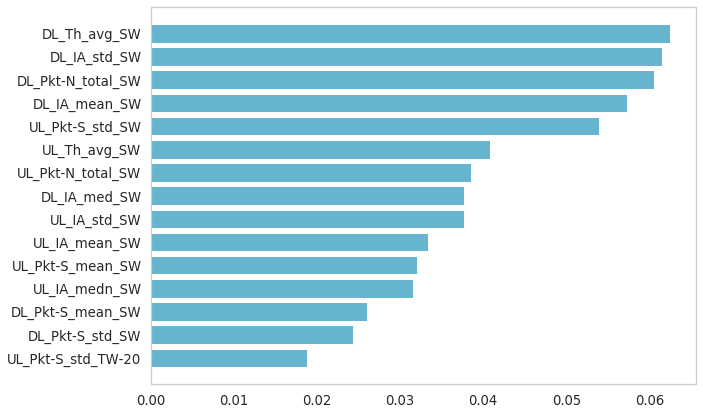

In [103]:
clf =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(A_all, yy)

importances = clf.feature_importances_
indices = np.argsort(importances)
top_k = 15
new_indices = indices[-top_k:]
# fig = plt.figure(figsize=(15, 10))
# plt.rcParams["axes.grid"] = False
# #plt.title('Feature Importances')
# plt.barh(range(len(new_indices)), importances[new_indices], color='c', align='edge')
# plt.yticks(range(len(new_indices)), [F3[i] for i in new_indices])
# #plt.xticks((0, 0.02, 0.07))
# plt.xlabel('Relative Importance')
# #plt.show()
# plt.savefig('b.pdf')
fig = plt.figure(figsize=(10,6))
plt.rcParams["axes.grid"] = False
ax = fig.add_subplot(111)
ax.barh(range(len(new_indices)), importances[new_indices], color='c',align='center')
plt.yticks(range(len(new_indices)), [F3[i] for i in new_indices])

plt.tight_layout()
#plt.show()
plt.savefig('full.pdf')

In [109]:
L=[]
for i in new_indices:
    l='%s'%F3[i]
    L.append(l)
L

['UL_Pkt-S_std_TW-20',
 'DL_Pkt-S_std_SW',
 'DL_Pkt-S_mean_SW',
 'UL_IA_medn_SW',
 'UL_Pkt-S_mean_SW',
 'UL_IA_mean_SW',
 'UL_IA_std_SW',
 'DL_IA_med_SW',
 'UL_Pkt-N_total_SW',
 'UL_Th_avg_SW',
 'UL_Pkt-S_std_SW',
 'DL_IA_mean_SW',
 'DL_Pkt-N_total_SW',
 'DL_IA_std_SW',
 'DL_Th_avg_SW']

In [110]:
A_ten=X.loc[:,X.columns.isin(['UL_Pkt-S_std_TW-20',
 'DL_Pkt-S_std_SW',
 'DL_Pkt-S_mean_SW',
 'UL_IA_medn_SW',
 'UL_Pkt-S_mean_SW',
 'UL_IA_mean_SW',
 'UL_IA_std_SW',
 'DL_IA_med_SW',
 'UL_Pkt-N_total_SW',
 'UL_Th_avg_SW',
 'UL_Pkt-S_std_SW',
 'DL_IA_mean_SW',
 'DL_Pkt-N_total_SW',
 'DL_IA_std_SW',
 'DL_Th_avg_SW'])]

In [111]:
A_all_train, A_all_test,A_all_y_train, A_all_y_test = train_test_split( A_all, yy, test_size=0.2, random_state=101)
A_ten_train, A_ten_test,A_ten_y_train, A_ten_y_test = train_test_split( A_ten, yy, test_size=0.2, random_state=101)

In [112]:

# load the model from disk
model =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(A_all_train, A_all_y_train)


y_pred = model.predict(A_all_test)


accuracy = metrics.accuracy_score(A_all_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(A_all_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))



------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.9880
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.99      0.99      0.99      7382
          SD       0.99      0.98      0.98      6783
          HD       0.99      1.00      0.99      5987

    accuracy                           0.99     20152
   macro avg       0.99      0.99      0.99     20152
weighted avg       0.99      0.99      0.99     20152



In [108]:
# load the model from disk
model =  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(A_ten_train, A_ten_y_train)
y_pred = model.predict(A_ten_test)


accuracy = metrics.accuracy_score( A_ten_y_test, y_pred)
print()
print('------------------------------------------------------')
print ("Accuracy of our RF classification  model based on test data is : {0:.4f}".format(accuracy))
print('------------------------------------------------------')

print()
print('------------------------------------------------------')
print ("Classification Report\n")
print('------------------------------------------------------')

print ("{0}".format(metrics.classification_report(A_ten_y_test.ravel(), y_pred,target_names = ['LD', 'SD', 'HD'])))


------------------------------------------------------
Accuracy of our RF classification  model based on test data is : 0.9881
------------------------------------------------------

------------------------------------------------------
Classification Report

------------------------------------------------------
              precision    recall  f1-score   support

          LD       0.99      0.99      0.99      7382
          SD       0.98      0.98      0.98      6783
          HD       0.99      1.00      0.99      5987

    accuracy                           0.99     20152
   macro avg       0.99      0.99      0.99     20152
weighted avg       0.99      0.99      0.99     20152




------------------------------------------------------
Confusion Matrix Result 

------------------------------------------------------
Confusion matrix without normalization
[[7297   81    4]
 [  79 6654   50]
 [   0   27 5960]]
Normalized Confusion Matrix
[[9.88e-01 1.10e-02 5.42e-04]
 [1.16e-02 9.81e-01 7.37e-03]
 [0.00e+00 4.51e-03 9.95e-01]]


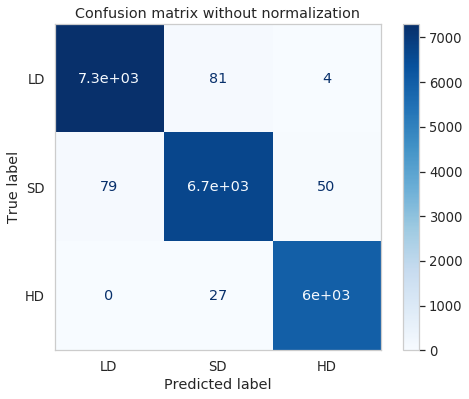

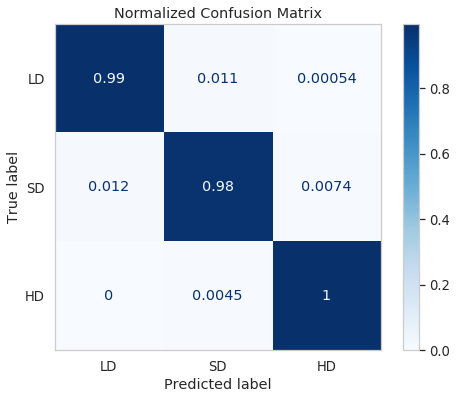

In [66]:
from sklearn.metrics import plot_confusion_matrix
print()
print('------------------------------------------------------')
print ("Confusion Matrix Result \n")
print('------------------------------------------------------')

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix without normalization", None), ("Normalized Confusion Matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = plot_confusion_matrix(model,A_ten_test, A_ten_y_test, display_labels=['LD','SD','HD'],
                                 cmap=plt.cm.Blues,normalize=normalize,ax=ax)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.savefig('normalized_confusion.pdf')
#plt.show()